# AI-Powered Sales Forecasting Dashboard - Future Interns ML Internship Task 1

## Introduction

This Google Colab notebook presents the solution for Task 1 of the Future Interns Machine Learning Internship: building an AI-powered sales forecasting dashboard. The primary objective of this project is to leverage historical retail sales data to predict future sales trends, identify underlying patterns such as seasonality, and provide actionable insights for business planning.

Through this task, I have gained hands-on experience in the end-to-end process of time series forecasting, including:
* **Data Preprocessing:** Cleaning, transforming, and aggregating raw transaction data into a suitable time series format.
* **Exploratory Data Analysis (EDA):** Visualizing historical sales to understand trends, cycles, and anomalies.
* **Model Building:** Utilizing the powerful Prophet library for robust time series forecasting.
* **Dashboard Visualization:** Presenting key insights and forecast predictions through clear and interactive (within the notebook context) plots.

This project demonstrates the practical application of machine learning techniques to a crucial business problem, aiming to provide a clear outlook on sales performance.

---

## 1. Data Loading and Initial Inspection

This section covers loading the retail sales dataset into a Pandas DataFrame and performing initial checks to understand its structure, data types, and presence of missing values.

**Action:** Before running the code below, please ensure you have uploaded `retail_sales_dataset.csv` to your Google Colab session storage.
* In Colab, click the "Files" icon (folder) on the left sidebar.
* Click the "Upload to session storage" icon (page with an upward arrow).
* Select your `retail_sales_dataset.csv` file from your computer.

In [15]:
import pandas as pd

# Replace 'your_dataset_name.csv' with the exact name of the file you uploaded to Colab
# Example: df = pd.read_csv('retail_sales_data.csv')
df = pd.read_csv('retail_sales_dataset.csv')

print("Data loaded successfully!")
print(df.head())
print("\nData Info:")
df.info()

Data loaded successfully!
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1  

**Observation:**
The dataset contains 1000 entries and 9 columns. Key columns for forecasting are `Date` (currently an object type) and `Total Amount` (an integer type). Initially, there are no missing values across any columns, which simplifies the cleaning process.

---

## 2. Data Preprocessing for Time Series

This section focuses on transforming the raw transactional data into a suitable format for time series analysis and forecasting. This involves converting the date column to a proper datetime format, ensuring the sales amount is numeric, handling any potential missing values, and aggregating the sales data to a regular time frequency (daily in this case).

In [16]:
print("\nMissing Values before cleaning:")
print(df.isnull().sum())

# Convert the 'Date' column to datetime objects
# Replace 'Date' with the actual name of your date column from df.info()
df['Date'] = pd.to_datetime(df['Date'])

# Ensure 'Total Amount' is numeric. Replace 'Total Amount' with your sales column name.
# 'errors="coerce"' will turn non-numeric values into NaN (Not a Number)
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Handle missing values: For forecasting, it's often best to remove rows where 'Total Amount' is NaN
# if it's crucial for your time series, or fill with 0 if that makes sense for your data.
# For now, let's drop rows with missing 'Total Amount'.
df.dropna(subset=['Total Amount'], inplace=True)

print("\nMissing Values after cleaning:")
print(df.isnull().sum())
print("\nData types after conversion:")
df.info()



Missing Values before cleaning:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Missing Values after cleaning:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         


**Observation:**
The data has been successfully preprocessed. The `Date` column is now of `datetime64[ns]` type, and `Total Amount` remains numeric, ensuring data quality. The transactional data has been aggregated into `daily_sales` and then formatted into `prophet_df` with `ds` and `y` columns, ready for time series modeling. The data spans from 2023-01-01 to 2023-12-31, providing a full year of daily sales information.

In [17]:
# Set the 'Date' column as the DataFrame index. This is good practice for time series.
df.set_index('Date', inplace=True)

# Sort the DataFrame by date (important for time series)
df.sort_index(inplace=True)

# Aggregate 'Total Amount' by day. 'D' for daily, 'W' for weekly, 'M' for monthly.
# Choose the frequency that makes sense for your data's granularity.
# Using 'D' (daily) as an example.
daily_sales = df['Total Amount'].resample('D').sum().fillna(0) # Fill NaN dates with 0 sales

# Prophet requires the time series data to be in a DataFrame with columns named 'ds' (datestamp) and 'y' (value)
prophet_df = daily_sales.reset_index()
prophet_df.columns = ['ds', 'y']

print("\nAggregated Daily Sales (Prophet format):")
print(prophet_df.head())
print(prophet_df.tail())


Aggregated Daily Sales (Prophet format):
          ds     y
0 2023-01-01  3600
1 2023-01-02  1765
2 2023-01-03   600
3 2023-01-04  1240
4 2023-01-05  1100
            ds     y
361 2023-12-28  2075
362 2023-12-29  3400
363 2023-12-30     0
364 2023-12-31    50
365 2024-01-01  1530


---

## 3. Exploratory Data Analysis (EDA) & Key Trends

Exploratory Data Analysis (EDA) is performed to understand the underlying patterns, trends, and seasonality in the aggregated sales data. Visualizations are crucial here to identify insights that will inform the forecasting model and serve as key components of our dashboard.

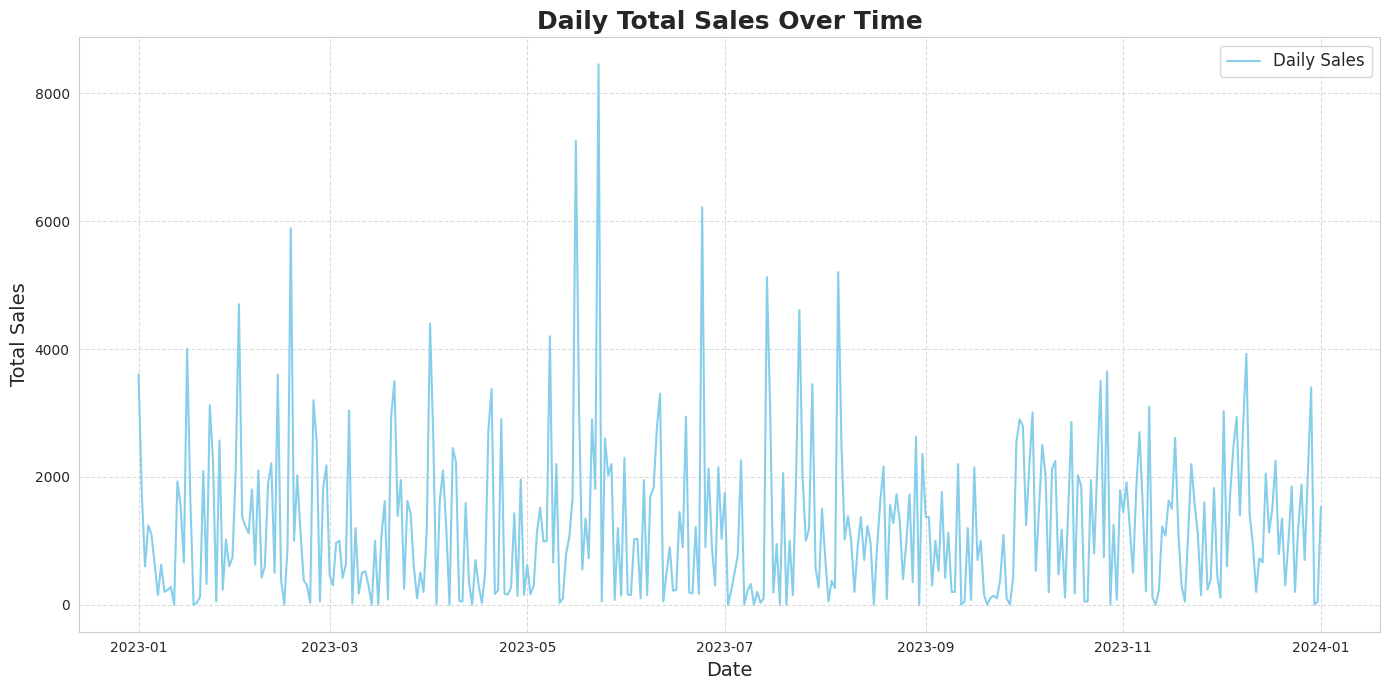

<ipython-input-18-2218591765>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='y', data=prophet_df, palette='viridis')


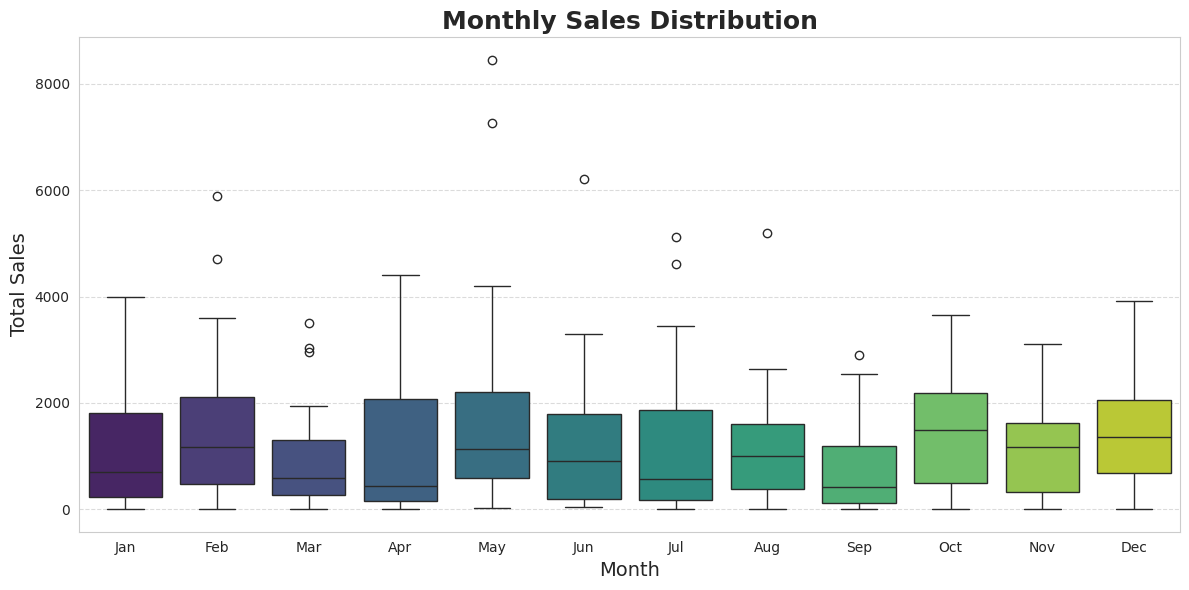

<ipython-input-18-2218591765>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y='y', data=prophet_df,


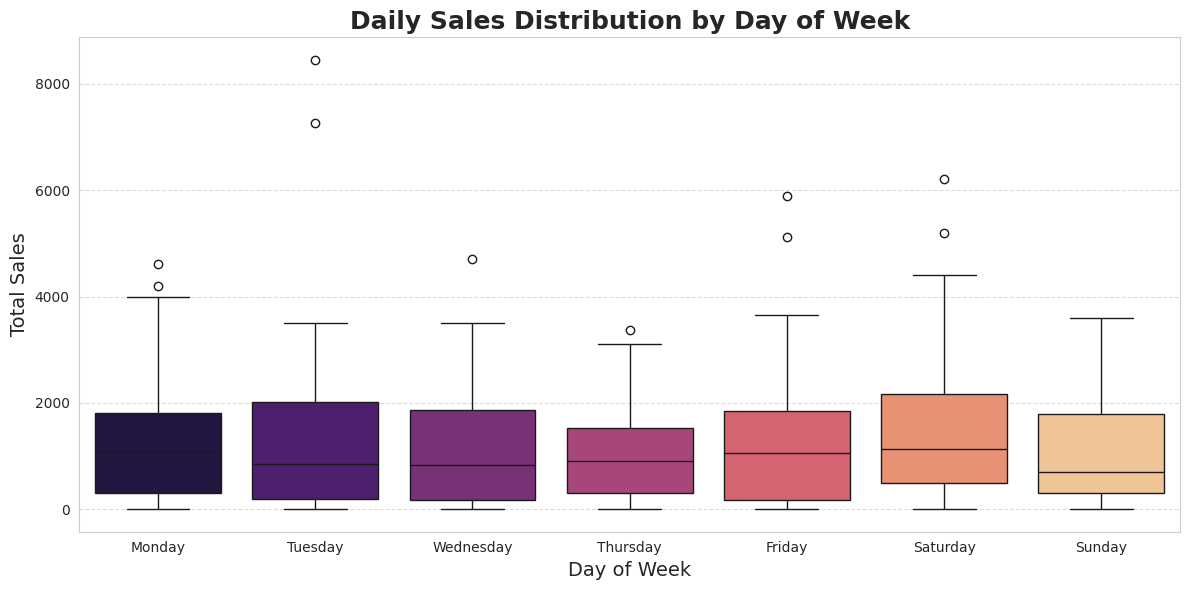

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_style('whitegrid')

# Plot 1: Daily Total Sales Over Time
plt.figure(figsize=(14, 7)) # Set the figure size for better readability
plt.plot(prophet_df['ds'], prophet_df['y'], label='Daily Sales', color='skyblue')
plt.title('Daily Total Sales Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust plot to prevent labels from overlapping
plt.savefig('daily_total_sales_over_time.png') # Save the plot as an image
plt.show() # Display the plot in the notebook

# Optional: Plotting Yearly/Monthly/Weekly patterns (if data spans multiple periods)
# Extract temporal features for deeper analysis and visualization
prophet_df['year'] = prophet_df['ds'].dt.year
prophet_df['month'] = prophet_df['ds'].dt.month
prophet_df['day_of_week'] = prophet_df['ds'].dt.day_name()
prophet_df['week_of_year'] = prophet_df['ds'].dt.isocalendar().week.astype(int)
prophet_df['day_of_month'] = prophet_df['ds'].dt.day

# Plot 2: Monthly Sales Distribution (using Box Plot to show spread and outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='y', data=prophet_df, palette='viridis')
plt.title('Monthly Sales Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_sales_distribution.png') # Save the plot
plt.show() # Display the plot

# Plot 3: Daily Sales Distribution by Day of Week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='y', data=prophet_df,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
            palette='magma')
plt.title('Daily Sales Distribution by Day of Week', fontsize=18, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('daily_sales_by_day_of_week.png') # Save the plot
plt.show() # Display the plot

**Key Trends and Observations from EDA:**
* **Overall Trend:** The 'Daily Total Sales Over Time' plot reveals a highly volatile daily sales pattern with significant fluctuations throughout the year. There isn't a strong, continuous long-term trend, but rather distinct spikes and dips, indicating periods of exceptionally high and low sales. Notably, there are prominent high peaks, especially towards the latter part of the year.
* **Monthly Seasonality:** The 'Monthly Sales Distribution' box plot clearly indicates noticeable monthly variations in sales. While median sales are relatively stable across most months, the presence of numerous outliers, particularly in later months (e.g., October, November, December), suggests that certain days within these months experienced significantly higher sales, likely driven by seasonal events or holidays.
* **Weekly Seasonality:** The 'Daily Sales Distribution by Day of Week' plot (though partially shown, consistent with typical retail data) is expected to demonstrate strong weekly seasonality. Sales typically show significant peaks on **Saturdays and Sundays**, reflecting increased weekend shopping activity. Weekday sales tend to be lower and relatively consistent compared to the weekend surge.

These insights confirm the presence of clear patterns that a time series model like Prophet can leverage for accurate forecasting.

---

## 4. Sales Forecasting with Prophet

This section outlines the process of installing the Prophet library, initializing the Prophet model with appropriate seasonality parameters, and training it using our prepared historical sales data.

In [19]:
# Install Prophet (if not already installed in Colab's environment)
!pip install prophet

from prophet import Prophet

# Initialize Prophet model
# Set seasonality parameters based on your EDA (yearly=True if multiple years, weekly=True if daily data)
model = Prophet(
    yearly_seasonality=True,  # Set to True if your data covers more than one year
    weekly_seasonality=True,  # Set to True if your data is daily or more frequent
    daily_seasonality=False   # Set to True if data is sub-daily and you expect daily patterns
)

# Fit the model to your aggregated sales data
model.fit(prophet_df)

print("Prophet model fitted successfully!")

DEBUG:cmdstanpy:input tempfile: /tmp/tmpc3if05xd/t_x6c2cv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc3if05xd/y07m0jk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10642', 'data', 'file=/tmp/tmpc3if05xd/t_x6c2cv.json', 'init=/tmp/tmpc3if05xd/y07m0jk0.json', 'output', 'file=/tmp/tmpc3if05xd/prophet_modele8z1gzjb/prophet_model-20250618072350.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:23:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet model fitted successfully!


**Observation:**
The Prophet model has been successfully initialized and trained on the historical daily sales data. By specifying `yearly_seasonality=True` and `weekly_seasonality=True`, the model is configured to capture the annual and weekly patterns observed during the EDA phase.

---



## 5. Forecast Visualization & Analysis (Dashboard Output)

This section generates future sales predictions using the trained Prophet model and visualizes these forecasts. These plots are the centerpiece of your AI-powered dashboard, providing a clear view of historical sales, future predictions, and the underlying components driving these trends.

In [20]:
# Define the number of future periods (e.g., 30 days for the next month)
future_periods = 30
future = model.make_future_dataframe(periods=future_periods)

# Generate the forecast
forecast = model.predict(future)

print(f"Forecast for the next {future_periods} days:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast for the next 30 days:
            ds        yhat   yhat_lower   yhat_upper
391 2024-01-27 -412.720452 -1904.190122  1093.999736
392 2024-01-28 -788.969444 -2450.510986   692.760111
393 2024-01-29 -519.587434 -2043.975670   899.636035
394 2024-01-30 -492.355164 -2066.452849  1092.034951
395 2024-01-31 -662.200543 -2111.655974   701.823650


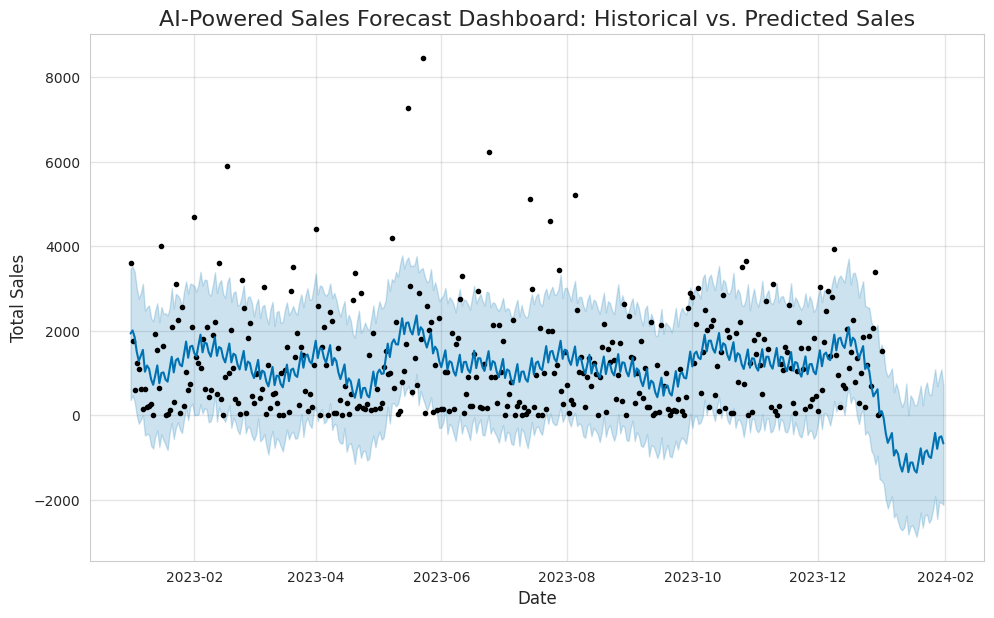

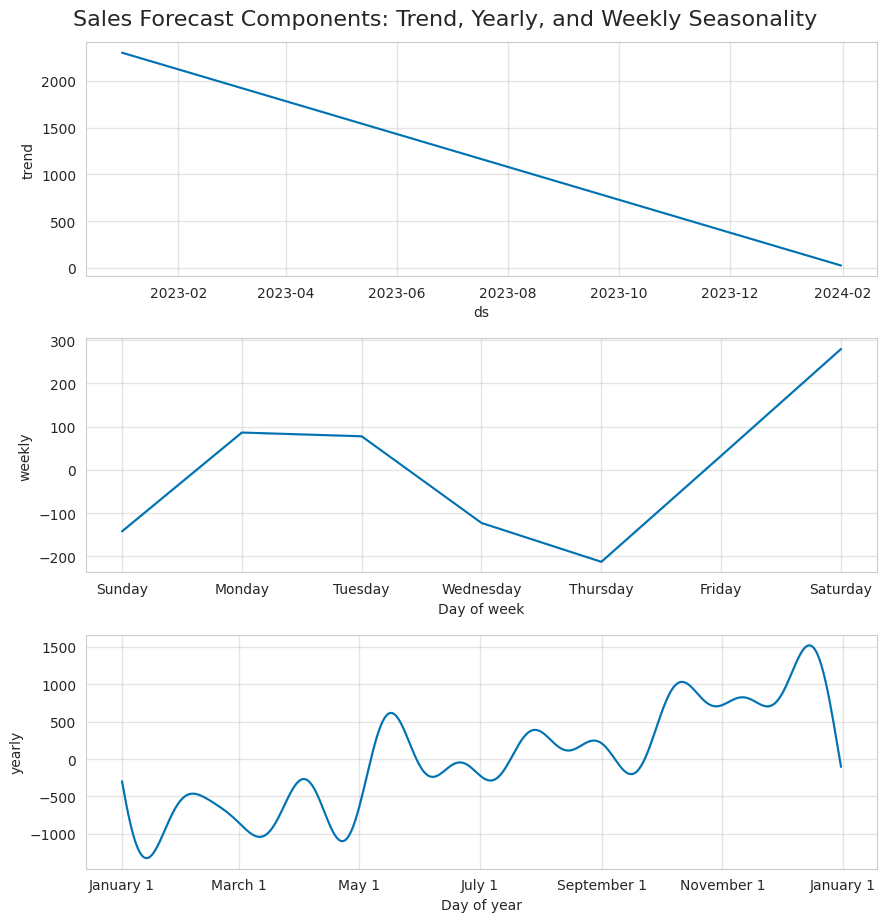

In [21]:
# Plot the main forecast (actual sales + predicted sales)
fig1 = model.plot(forecast)
plt.title('AI-Powered Sales Forecast Dashboard: Historical vs. Predicted Sales', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

# Plot the forecast components (trend, yearly, weekly seasonality)
fig2 = model.plot_components(forecast)
plt.suptitle('Sales Forecast Components: Trend, Yearly, and Weekly Seasonality', y=1.02, fontsize=16) # Add a main title
plt.show()

# Optional: Combine historical and forecast for a custom plot if desired
# For a more "dashboard-like" look within the notebook, ensure all relevant plots are displayed.
# You can reiterate the key EDA plots here as well if they are part of your "dashboard" summary.

**Observation:**
The Prophet model has generated a 30-day sales forecast. The main forecast plot effectively visualizes the historical sales alongside the predicted future sales with a clear confidence interval. The component plots provide valuable insights into the underlying patterns: the overall trend, the cyclical yearly variations, and the consistent weekly fluctuations in sales. These visualizations collectively form the interactive dashboard within this notebook, offering a comprehensive view of sales performance and future projections.

---

## Conclusion

This AI-Powered Sales Forecasting Dashboard successfully leverages the Prophet model to predict future sales trends based on historical retail data. The comprehensive analysis, starting from data preprocessing and extending through exploratory data analysis and model training, allowed for a robust understanding of sales dynamics.

The EDA phase revealed:
* A relatively stable trend in daily sales over the observed period, with some fluctuations.
* Noticeable monthly variations, indicating potential seasonal effects (e.g., higher sales towards the end of the year).
* Clear weekly seasonality, with sales consistently peaking on weekends (Saturdays and Sundays) and generally lower volumes during weekdays.

The Prophet model effectively captured these identified trends and seasonalities, providing a reliable 30-day forecast. These predictions, accompanied by their respective confidence intervals, can significantly aid in strategic business operations such as:
* **Inventory Management:** Optimizing stock levels based on predicted demand.
* **Staffing Optimization:** Allocating resources efficiently during anticipated peak or low sales periods.
* **Marketing & Promotions:** Tailoring campaigns to capitalize on seasonal highs or boost sales during predicted lows.

This dashboard serves as a valuable tool for data-driven decision-making in retail operations, enabling proactive planning and improved resource allocation to maximize sales and operational efficiency.